In [168]:
import pandas as pd

In [169]:
columns = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H7_Vaccination policy',
       'H8_Protection of elderly people',
       'V1_Vaccine Prioritisation (summary)',
       'V2_Vaccine Availability (summary)',
       'V3_Vaccine Financial Support (summary)']

numerical = ['H4_Emergency investment in healthcare', 'H5_Investment in vaccines']
target = ['Daily_cases']            

In [170]:
df = pd.read_csv("Data/Full_United States.csv", index_col = 0)
df = df.set_index('Date')
df.head(3)

,CountryName_x,CountryCode_x,Jurisdiction,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,...,H7_Vaccination policy,H8_Protection of elderly people,ConfirmedCases,ConfirmedDeaths,Daily_cases,like_index,retweet_index,V1_Vaccine Prioritisation (summary),V2_Vaccine Availability (summary),V3_Vaccine Financial Support (summary)
Date,,,,,,,,,,,,,,,,,,,,,
1/1/2020,United States,USA,NAT_TOTAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2/1/2020,United States,USA,NAT_TOTAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,0
3/1/2020,United States,USA,NAT_TOTAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,0


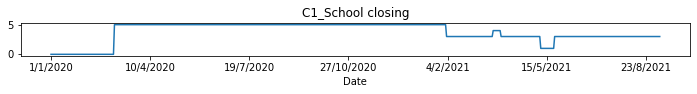

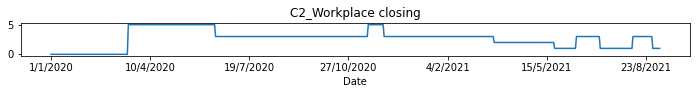

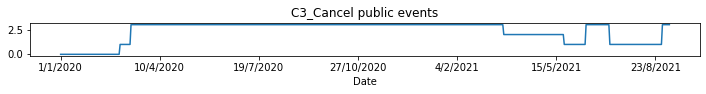

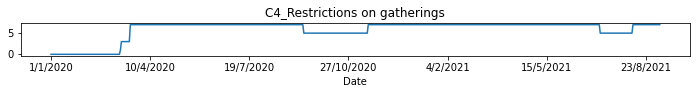

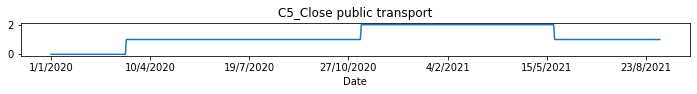

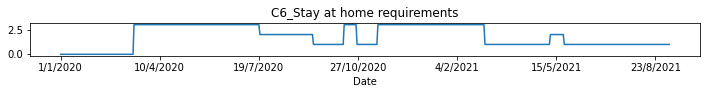

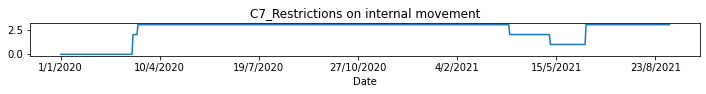

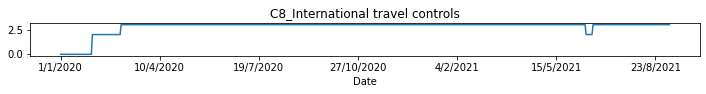

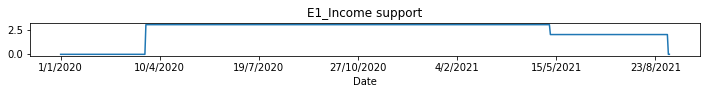

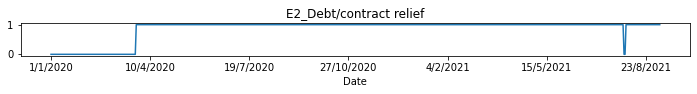

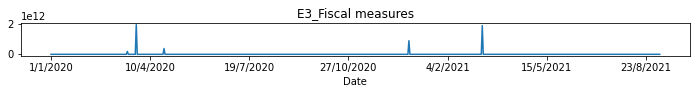

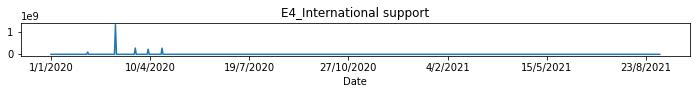

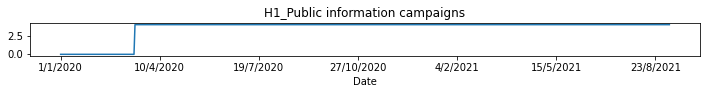

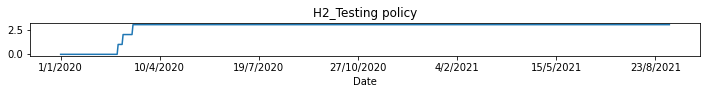

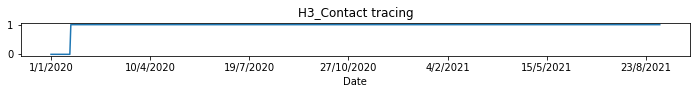

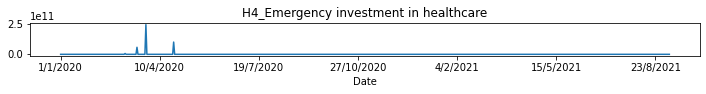

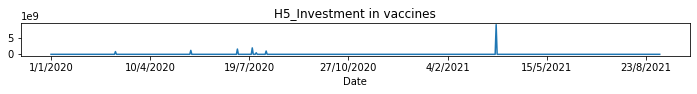

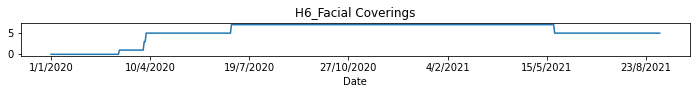

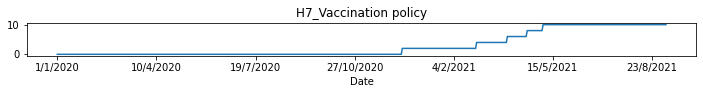

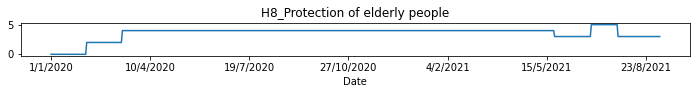

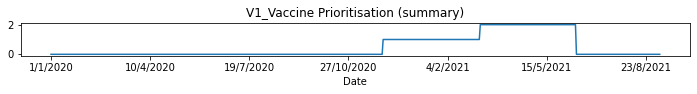

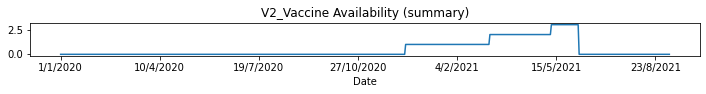

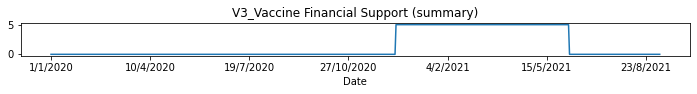

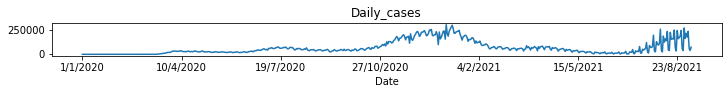

In [171]:
import matplotlib.pyplot as plt
for column in columns+target:
    df[column].plot(figsize = (12,.6))
    plt.title(column)
    plt.show()

In [172]:
for column in columns:
    if column in numerical:
        df[column] =df[column].rolling(7).mean().shift(7) - df[column].rolling(7).mean()
    else:
        df[column] = df[column].shift(7) - df[column]
#df[target] = df[target].rolling(14).mean().shift(14) - df[target].rolling(14).mean()

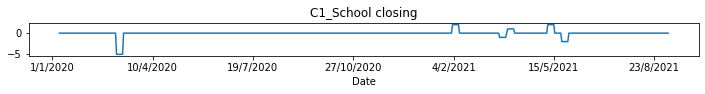

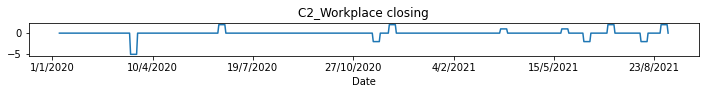

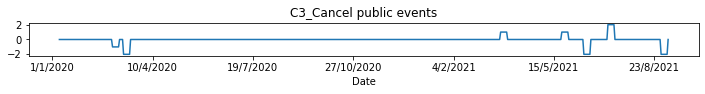

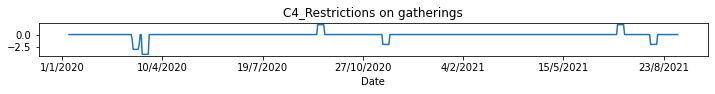

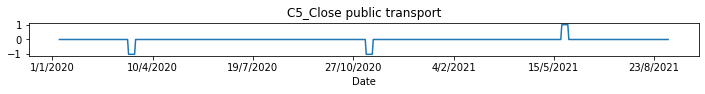

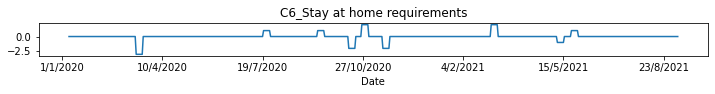

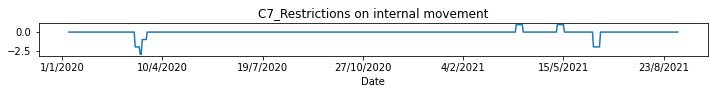

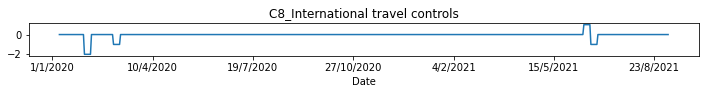

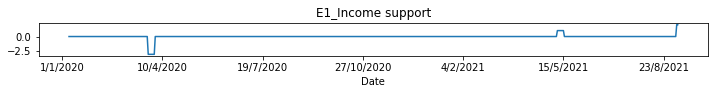

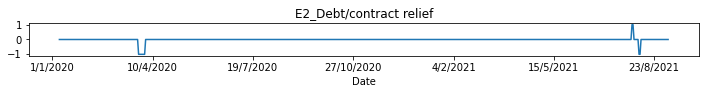

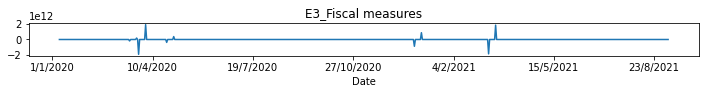

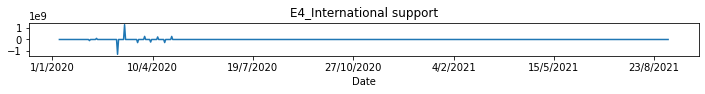

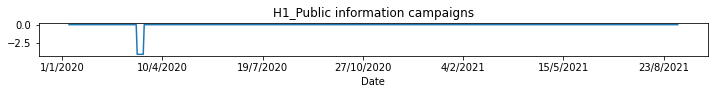

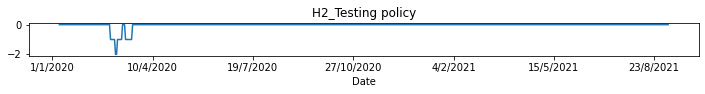

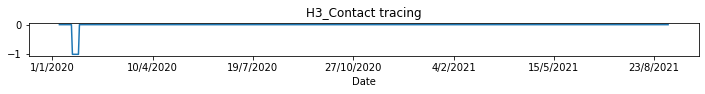

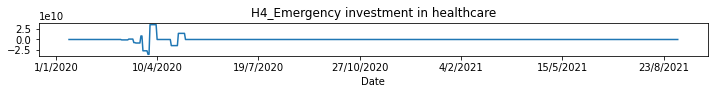

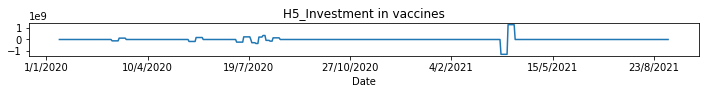

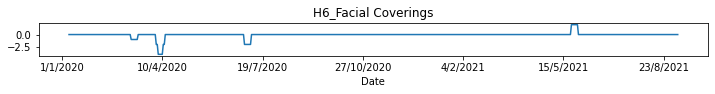

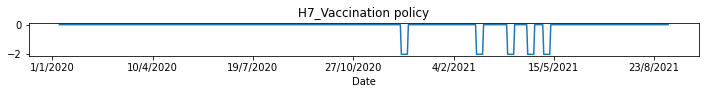

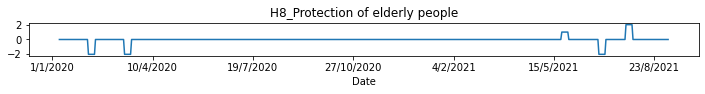

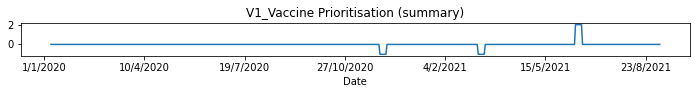

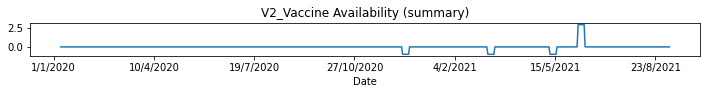

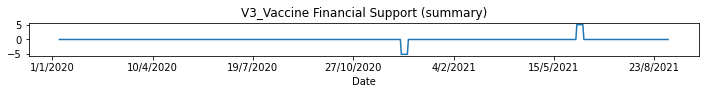

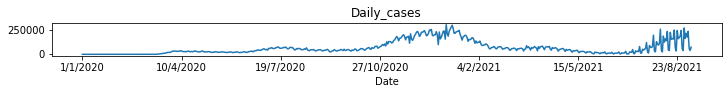

In [173]:
for column in columns+target:
    df[column].plot(figsize = (12,.6))
    plt.title(column)
    plt.show()

In [197]:
interv = columns[0]
Date = df.index[-100]
print(Date)
enhance = df.loc[:Date,:].tail(14)[interv].values.mean() > 0 
case = (df.loc[:Date,'Daily_cases'].values[-3] - df.loc[Date:,'Daily_cases'].values[2]) < 0

print('Interv: ', interv)
print('Intervention Enhenced: ', enhance)
print('Case Decrease: ', case)

30/5/2021
Interv:  C1_School closing
Intervention Enhenced:  False
Case Decrease:  True
